<a href="https://colab.research.google.com/github/ChhaviC/comp3132/blob/main/LabWeek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [ ]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  23 176 234 234  84  16   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  46 244 2

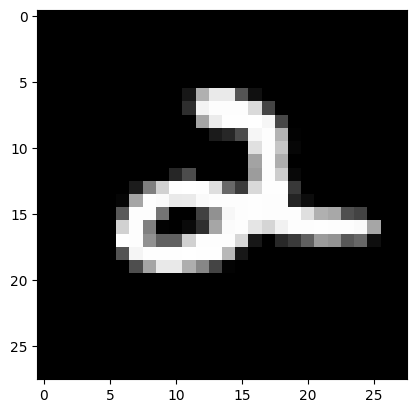

In [ ]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images_orig.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### **Exercise 1:** Display the fourth image in the `test set` with its label.

Test Image Shape:  (28, 28)
Label:  0


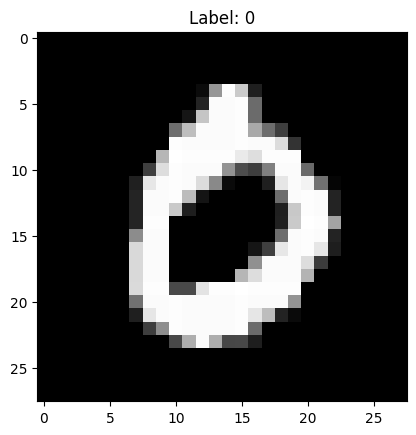

In [ ]:
index = 3  # Indexing starts from 0, so the fourth image is at position 3
test_image = test_images_orig[index]
test_label = test_labels[index]

print("Test Image Shape: ", test_image.shape)
print("Label: ", test_label)

# Visualizing the image
plt.imshow(test_image, cmap="gray")
plt.title(f"Label: {test_label}")
plt.show()

# A first look at a neural network

## **Step 1:** The network architecture

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

In [ ]:
train_images = train_images_orig.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [ ]:


(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()
train_images = train_images_orig.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images_orig.reshape((10000, 28 * 28)).astype("float32") / 255

print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)


Training data shape: (60000, 784)
Test data shape: (10000, 784)


### Tensor reshaping

In [ ]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [ ]:
a = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

# Reshape the matrix into a 6 x 1 matrix
reshaped_a = a.reshape((6, 1))
reshaped_a


array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

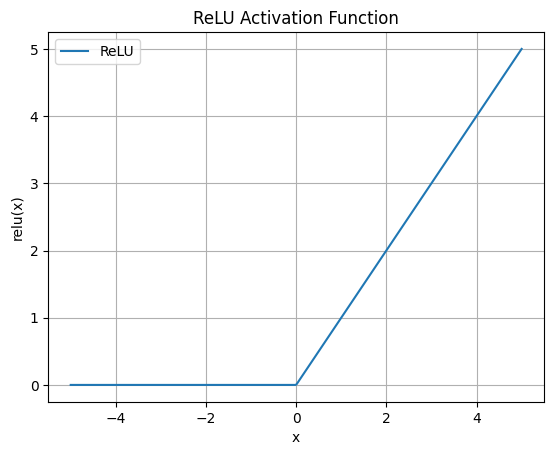

In [ ]:
def relu(x):
    return np.maximum(0, x)

# Generate x values from -5 to 5
x = np.linspace(-5, 5, 400)

# Apply the relu function to x
y = relu(x)

# Plot the relu function
plt.plot(x, y, label='ReLU')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.grid(True)
plt.legend()
plt.show()

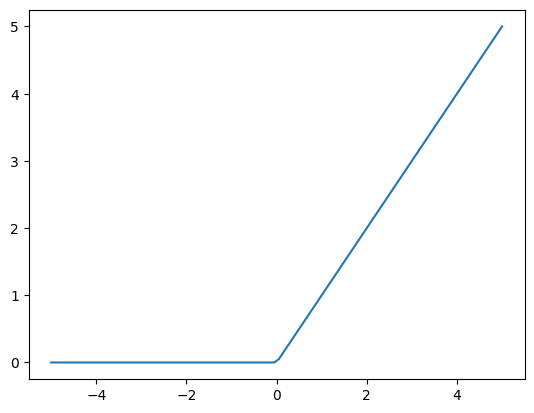

In [ ]:
# my solution output

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

your answer here:The ReLU function returns 0 for all negative values, and it leaves non-negative values unchanged.
Input: [-10, 5, 0, -2, 6]
Applying ReLU:
max(0, -10) = 0
max(0, 5) = 5
max(0, 0) = 0
max(0, -2) = 0
max(0, 6) = 6
Result:
The result after applying ReLU to [-10, 5, 0, -2, 6] is [0, 5, 0, 0, 6].

### **Output layer** - `Sigmoid` and `Softmax` activation function

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

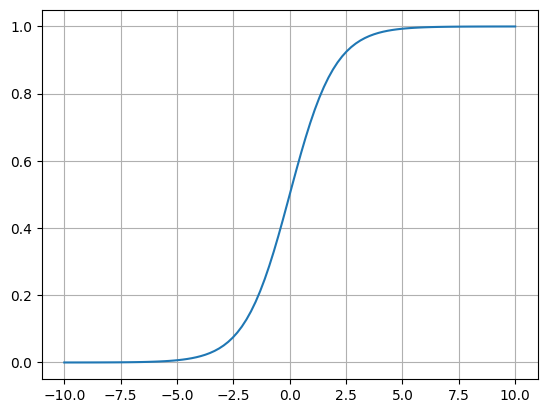

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

In [ ]:

logits = np.array([3.2, 1.3, 0.2, 0.8])

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply the sigmoid function to logits
logits_scaled = sigmoid(logits)

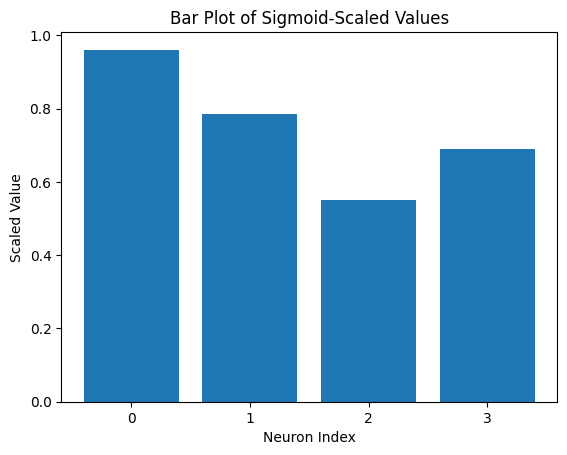

In [ ]:
# Plotting the scaled values
plt.bar(np.arange(4), logits_scaled)
plt.title('Bar Plot of Sigmoid-Scaled Values')
plt.xlabel('Neuron Index')
plt.ylabel('Scaled Value')
plt.xticks(np.arange(4))
plt.show()

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [ ]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

In [ ]:

logits = np.array([3.2, 1.3, 0.2, 0.8])

# Define the softmax function
def softmax(z):
    e_z = np.exp(z - np.max(z))  # for numerical stability
    return e_z / np.sum(e_z)

# Apply the softmax function to logits
probs = softmax(logits)

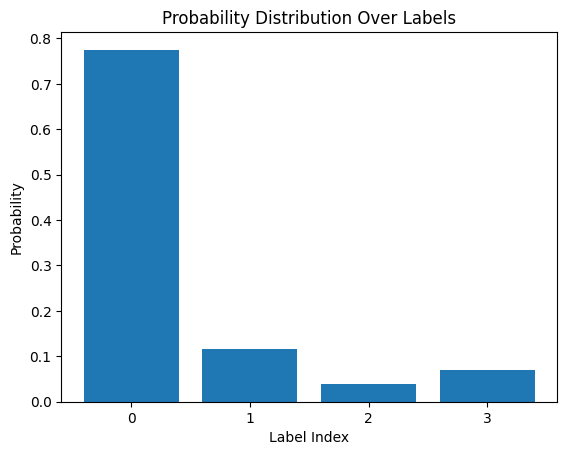

In [ ]:
# Plotting the probability distribution
plt.bar(np.arange(4), probs)
plt.title('Probability Distribution Over Labels')
plt.xlabel('Label Index')
plt.ylabel('Probability')
plt.xticks(np.arange(4))
plt.show()


### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [ ]:
import numpy as np

# Logits from previous exercise
logits = np.array([3.2, 1.3, 0.2, 0.8])

# Softmax probabilities (calculated in previous exercise)
probs = softmax(logits)

# Find the predicted label using np.argmax()
predicted_class = np.argmax(probs)


> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels.**

> **You can try [Google Teachable Machine](https://teachablemachine.withgoogle.com/train/image) to explore this concept further.**

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >




In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

## **Step 2:** The compilation step

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## **Step 3:** "Fitting" the model

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8762 - loss: 0.4370
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9657 - loss: 0.1166
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9782 - loss: 0.0743
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9846 - loss: 0.0514
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9883 - loss: 0.0379


## **Step 4:** Using the model to make predictions

In [ ]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
predictions = model.predict(test_digits)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[1.6309153e-08, 4.8701515e-10, 6.4799474e-06, 1.1885406e-05,
        3.2060290e-12, 2.0961787e-08, 8.5780070e-13, 9.9998105e-01,
        7.5291275e-09, 5.8181257e-07],
       [8.3778140e-09, 1.9795586e-06, 9.9998701e-01, 8.7331728e-06,
        1.3857676e-15, 3.9189484e-07, 3.1878668e-07, 2.6480271e-14,
        1.5838690e-06, 6.0847926e-14],
       [1.5930391e-07, 9.9703217e-01, 1.7187555e-04, 5.0797471e-06,
        1.8897190e-04, 3.9706651e-05, 1.1177875e-04, 4.8454374e-04,
        1.9632876e-03, 2.4169251e-06]], dtype=float32)

### **Exercise 9:** Interpret the values in the `prediction`array.  

The values in the prediction array represent the probability distribution over the possible labels after applying the softmax function. These values indicate the likelihood (ranging from 0 to 1) that each label is the correct prediction.your answer here:

### See the result for the prediction of the first image

In [ ]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[1.6309153e-08 4.8701515e-10 6.4799474e-06 1.1885406e-05 3.2060290e-12
 2.0961787e-08 8.5780070e-13 9.9998105e-01 7.5291275e-09 5.8181257e-07]
Predicted label:  7


In [ ]:
print("highest prob: ", predictions[0][7])

highest prob:  0.99998105


In [ ]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


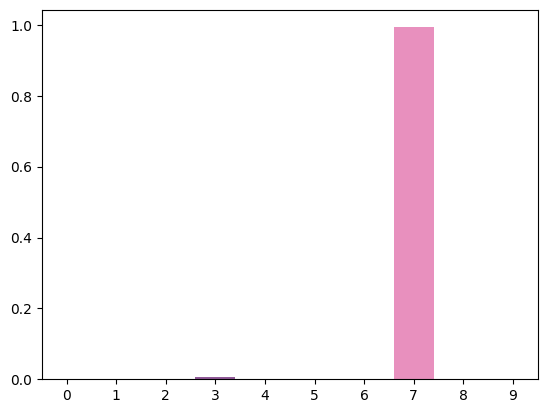

In [ ]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(_, _), (test_images_orig, test_labels) = mnist.load_data()

# Extract the fourth image from the test set
fourth_image = test_images_orig[3]  # indexing starts from 0

# Reshape the image to the required input shape (1, 784)
fourth_image_reshaped = fourth_image.reshape((1, 28 * 28)).astype("float32") / 255

# Define the softmax function (can be used if predictions are not done)
def softmax(z):
    e_z = np.exp(z - np.max(z))  # for numerical stability
    return e_z / np.sum(e_z)

# Assuming you have already a model that gives logits
# For demonstration, let's assume you already have logits from the model for the given image
# logits_for_fourth_image = your_model.predict(fourth_image_reshaped)

# Using the provided logits as example for now
# logits_for_fourth_image = np.array([...])  # Replace this with the actual logits from your model

# Calculate the probabilities using softmax
# probs = softmax(logits_for_fourth_image)

# Use np.argmax to find the predicted label
predicted_label = np.argmax(probs)

print(f'The predicted label for the fourth image is: {predicted_label}')


The predicted label for the fourth image is: 1


## **Step 5:** Evaluating the model on new data

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9783 - loss: 0.0751
test_acc: 0.9811999797821045


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.